# Grey-Box Room Modelling
You have a dataset collected from a room, which includes (i) indoor air temperature (Ti) in °C, (ii) outdoor air temperature (To) in °C, (iii) HVAC heating rate (q_HVAC) in W, and (iv) absorbed solar radiation (q_solar) in W. With this dataset, estimate the unknown parameters (Ci, Cw, R1, R2, R3).

### Load Libraries & Packages

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.signal import cont2discrete
import pickle
import matplotlib.pyplot as plt
import pygad

### Import and visualize Data

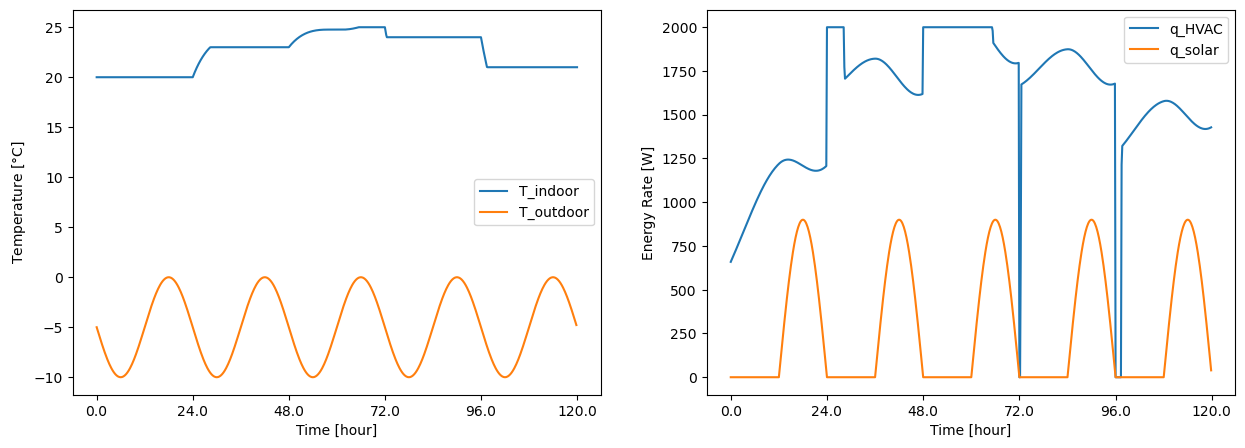

In [2]:
with open('HW1_Data.pickle', 'rb') as f:
    Data = pickle.load(f)
Ti = Data['Ti'] # indoor air temperature in degC
To = Data['To'] # outdoor air temperature in degC
q_HVAC = Data['q_HVAC'] # HVAC heating rate in W
q_solar = Data['q_solar'] # absorbed solar radiation in W
N = To.shape[0] # number of timesteps

t_span = np.arange(0,N+1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(Ti, label='T_indoor')
ax[0].plot(To, label='T_outdoor')
ax[0].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[0].set_ylabel('Temperature [$\degree$C]')
ax[0].set_xlabel('Time [hour]')
ax[0].legend()

ax[1].plot(q_HVAC, label='q_HVAC')
ax[1].plot(q_solar, label='q_solar')
ax[1].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[1].set_ylabel('Energy Rate [W]')
ax[1].set_xlabel('Time [hour]')
ax[1].legend()

plt.show()

### Define functions for grey-box modelling (system identification)
The figure below shows the network you use for the grey-box modelling.<br>
In the following cell, you need to **define (i) A and B matrixes and (ii) error metric** for the parameter estimation

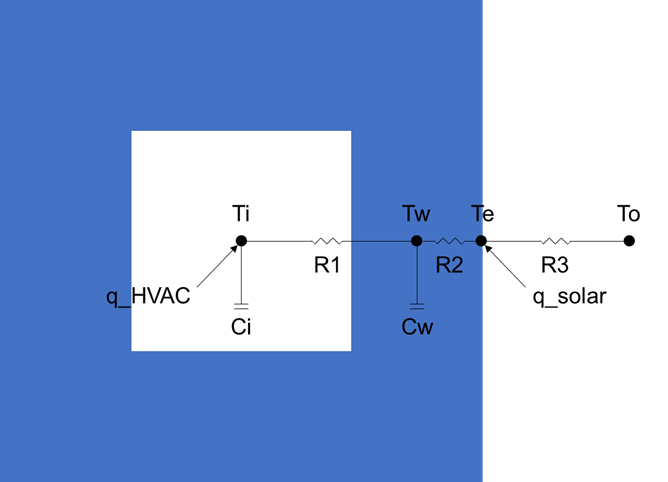

In [3]:
def simulation(Ci, Cw, R1, R2, R3):
    # continuous time invariant state-space
    A = np.array([[-1/(Ci*R1),1/(Ci*R1)],[1/(Cw*R1), -1/(Cw*R1)-1/(Cw*R2)+R3/(Cw*R2*(R2+R3))]])
    B = np.array([[1/Ci,0,0],[0,(R2*R3)/(Cw*R2*(R2+R3)),R2/(Cw*R2*(R2+R3))]])
    C = np.eye(2) # assume that C is known
    D = np.zeros((2,3)) # assume that D is known
      
    # discrete state-space
    Ad, Bd, Cd, Dd, _ = cont2discrete((A,B,C,D), 10*60) # discretization with 10 minute time interval
    
    x = np.zeros((2, N+1))
    x[0,0] = 20 # initial Ti
    x[1,0] = 15 # initial Tw
    
    # compute states over the simulation period
    for i in range(N):
        q_HVAC_t = q_HVAC[i]
        q_solar_t = q_solar[i]
        To_t = To[i]
        u_t = np.array([q_HVAC_t, q_solar_t, To_t])[:,None] # input vector
        x[:,i+1:i+2] = np.dot(Ad,x[:,i:i+1]) + np.dot(Bd,u_t)
    return x

def objective(ga_instance, solution, solution_idx):
    # scaled for better optimization
    Ci = solution[0] * 1000000
    Cw = solution[1] * 10000000
    R1 = solution[2] * 0.001
    R2 = solution[3] * 0.001
    R3 = solution[4] * 0.001
    
    # run simulation
    x = simulation(Ci, Cw, R1, R2, R3)
    
    # error metric
    metric = (np.sqrt(np.mean((Ti - x[0,:])**2)))
    return 1/metric

C:\Users\sjlee\anaconda3\lib\site-packages\pygad\pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(


Generation = 1
Fitness    = 1.8795741974627147
Change     = 1.8795741974627147
Generation = 2
Fitness    = 1.8795741974627147
Change     = 0.0
Generation = 3
Fitness    = 1.9402774070495348
Change     = 0.06070320958682007
Generation = 4
Fitness    = 1.9402774070495348
Change     = 0.0
Generation = 5
Fitness    = 1.9402774070495348
Change     = 0.0
Generation = 6
Fitness    = 1.9402774070495348
Change     = 0.0
Generation = 7
Fitness    = 2.41429892823679
Change     = 0.4740215211872554
Generation = 8
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 9
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 10
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 11
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 12
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 13
Fitness    = 2.41429892823679
Change     = 0.0
Generation = 14
Fitness    = 2.5091503024868116
Change     = 0.09485137425002144
Generation = 15
Fitness    = 2.5091503024868116
Cha

Generation = 124
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 125
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 126
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 127
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 128
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 129
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 130
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 131
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 132
Fitness    = 12.442265317231659
Change     = 0.0
Generation = 133
Fitness    = 13.142146030559434
Change     = 0.6998807133277758
Generation = 134
Fitness    = 13.476718694838233
Change     = 0.3345726642787987
Generation = 135
Fitness    = 13.476718694838233
Change     = 0.0
Generation = 136
Fitness    = 13.476718694838233
Change     = 0.0
Generation = 137
Fitness    = 13.476718694838233
Change     = 0.0
Generation = 138
Fitness    = 13.4767186948382

Generation = 247
Fitness    = 17.85349118666343
Change     = 0.0
Generation = 248
Fitness    = 17.85349118666343
Change     = 0.0
Generation = 249
Fitness    = 17.85349118666343
Change     = 0.0
Generation = 250
Fitness    = 18.242362420937653
Change     = 0.3888712342742231
Generation = 251
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 252
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 253
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 254
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 255
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 256
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 257
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 258
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 259
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 260
Fitness    = 18.242362420937653
Change     = 0.0
Generation = 261
Fitness    = 18.242362420937653
Change     = 0.

Generation = 372
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 373
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 374
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 375
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 376
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 377
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 378
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 379
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 380
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 381
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 382
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 383
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 384
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 385
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 386
Fitness    = 24.21002249890804
Change     = 0.0
Generation = 387
Fitness 

Generation = 498
Fitness    = 25.85558423046426
Change     = 0.0
Generation = 499
Fitness    = 25.85558423046426
Change     = 0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation = 500
Fitness    = 37.948821417330194
Change     = 12.093237186865935


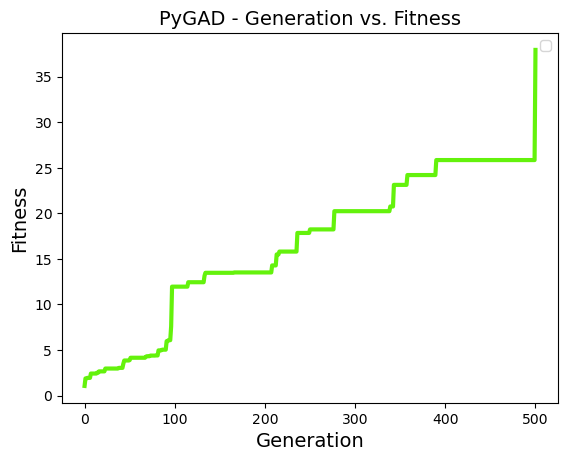

In [4]:
# parameter estimation with a genetic algorithm
last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=500,
                       num_parents_mating=10,
                       sol_per_pop=50,
                       gene_space={'low': 0, 'high': 10},
                       num_genes=5,
                       fitness_func=objective,
                       on_generation=on_generation
                      )
ga_instance.run()
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)

Ci: 2724920.465207662
Cw: 17831528.077589475
R1: 0.007584316516171399
R2: 0.0022826770429153964
R3: 0.0055146224014966825


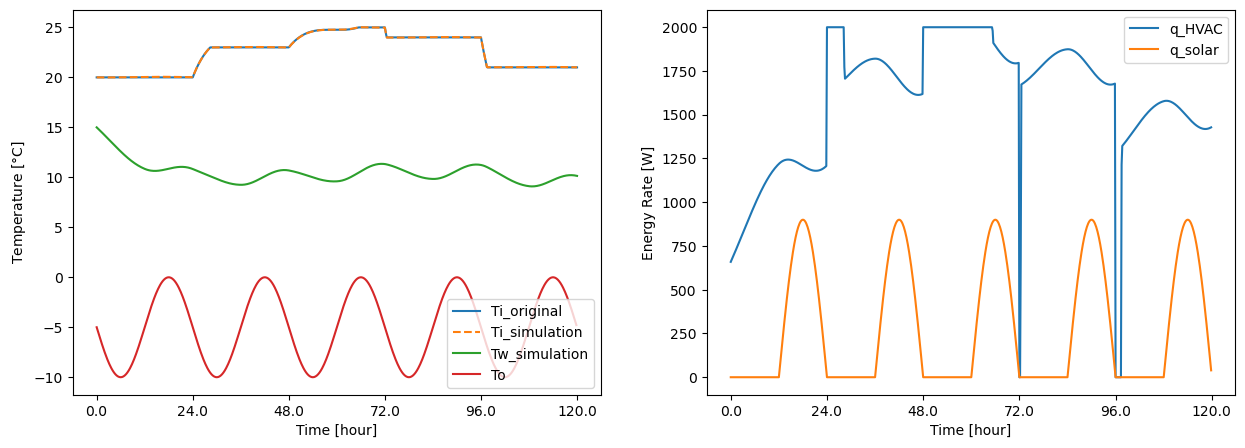

In [5]:
# scale them back
Ci = solution[0] * 1000000
Cw = solution[1] * 10000000
R1 = solution[2] * 0.001
R2 = solution[3] * 0.001
R3 = solution[4] * 0.001

print('Ci:',Ci)
print('Cw:',Cw)
print('R1:',R1)
print('R2:',R2)
print('R3:',R3)

x = simulation(Ci, Cw, R1, R2, R3)

Ti_simulation = x[0,:] # Indoor temperature 
Tw_simulation = x[1,:]

# plotting
t_span = np.arange(0,N+1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(Ti, label='Ti_original')
ax[0].plot(Ti_simulation, label='Ti_simulation', linestyle='--')
ax[0].plot(Tw_simulation, label='Tw_simulation')
ax[0].plot(To, label='To')
ax[0].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[0].set_ylabel('Temperature [$\degree$C]')
ax[0].set_xlabel('Time [hour]')
ax[0].legend()

ax[1].plot(q_HVAC, label='q_HVAC')
ax[1].plot(q_solar, label='q_solar')
ax[1].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[1].set_ylabel('Energy Rate [W]')
ax[1].set_xlabel('Time [hour]')
ax[1].legend()

plt.show()